In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [16]:
df6 = pd.read_excel('/content/drive/MyDrive/Google Collab/CarPrice_regression .xlsx')
df6=df6.replace('gas',1)
df6=df6.replace('diesel',0)
df6=df6.replace('std',1)
df6=df6.replace('turbo',0)
df6=df6.replace('two',1)
df6=df6.replace('four',0)
df6=df6.replace('convertible',1)
df6=df6.replace('hatchback',2)
df6=df6.replace('sedan',3)
df6=df6.replace('wagon',4)
df6=df6.replace('hardtop',5)
df6=df6.replace('rwd',1)
df6=df6.replace('fwd',2)
df6=df6.replace('4wd',3)
df6

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,1,1,1,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,1,1,1,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,1,2,1,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,0,3,2,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,0,3,3,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,1,0,3,1,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,0,0,3,1,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,1,0,3,1,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,0,0,3,1,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [17]:
correlation = df6.corr()
correlation

<ipython-input-17-b0e1f73bf119>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df6.corr()


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,-0.125568,-0.067729,-0.190352,0.168295,-0.051406,0.129729,0.170636,0.052387,...,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,0.194311,0.059866,0.664073,-0.398970,0.041671,-0.531954,-0.357612,-0.232919,...,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,-0.125568,0.194311,1.000000,0.401397,0.191491,-0.157580,0.132257,-0.308346,-0.212679,-0.233880,...,-0.217275,-0.069594,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.067729,0.059866,0.401397,1.000000,0.031792,-0.021276,0.066465,-0.257611,-0.234539,-0.300567,...,-0.324902,-0.108217,-0.212614,-0.222982,-0.295541,-0.241685,0.183383,0.202362,0.254416,-0.177926
doornumber,-0.190352,0.664073,0.191491,0.031792,1.000000,-0.447534,-0.098954,-0.447357,-0.398568,-0.207168,...,-0.197379,-0.020742,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.168295,-0.398970,-0.157580,-0.021276,-0.447534,1.000000,-0.056886,0.368772,0.376842,0.191511,...,0.240367,0.172381,0.224976,0.000598,0.156686,0.047234,-0.147031,-0.095826,-0.126939,0.161294
drivewheel,-0.051406,0.041671,0.132257,0.066465,-0.098954,-0.056886,1.000000,-0.459745,-0.485649,-0.470751,...,-0.575111,-0.524307,-0.481827,-0.071591,-0.127479,-0.518686,0.039417,0.449581,0.452220,-0.577992
wheelbase,0.129729,-0.531954,-0.308346,-0.257611,-0.447357,0.368772,-0.459745,1.000000,0.874587,0.795144,...,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,-0.212679,-0.234539,-0.398568,0.376842,-0.485649,0.874587,1.000000,0.841118,...,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,-0.233880,-0.300567,-0.207168,0.191511,-0.470751,0.795144,0.841118,1.000000,...,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325


<ipython-input-18-688a9e74b602>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sp.heatmap(df6.corr(),annot=True,cmap=plt.cm.Greens)


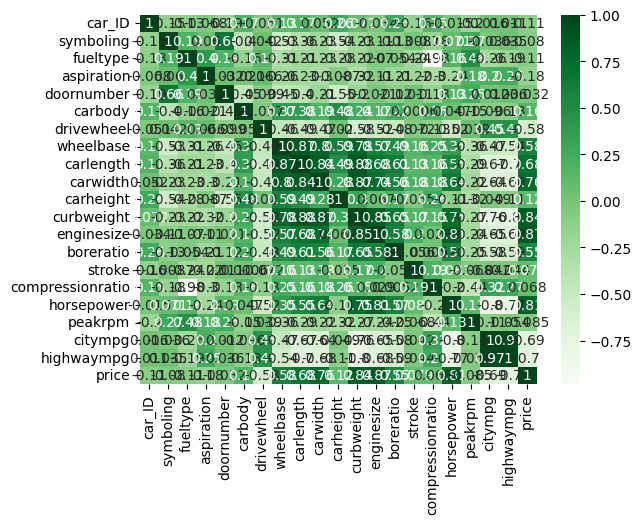

In [18]:
sp.heatmap(df6.corr(),annot=True,cmap=plt.cm.Greens)
plt.show()

In [28]:
x=df6[['fueltype','citympg','horsepower']]
y=df6['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train,y_train)

print("INTERCEPT: \n",regr.intercept_)
print("COEFFICIENT: \n",regr.coef_)

INTERCEPT: 
 11874.32435781855
COEFFICIENT: 
 [-7600.31866565   134.37773227  -234.57436806]


In [30]:
Prices = ( 11874.32435781855)+(-7600.31866565)*(1)+(134.37773227)*(21)+( -234.57436806)*(111)
print("PRICEs:\n",Prices)
pred = regr.predict(x_test)
pred

PRICEs:
 -18941.81678482145


array([ 6271.91715518,  4732.43986822, 22055.43406236, 24405.8710502 ,
        7449.48230274, 14197.85670525, 14598.6432484 ,  6139.88607655,
       10485.65137862,  6139.88607655,  7984.64657816,  6139.88607655,
        7984.64657816, 14129.49451229, 10303.24912317, 12332.75853387,
       19301.86387772, 21349.36430455,  6139.88607655,  6274.26380882,
        5333.61968296, 14466.61216978, 11847.41971741, 19133.30504898,
        9462.80163309, 10469.46129827, 12350.74955   ,  5333.61968296,
       14197.85670525,  6139.88607655,  9362.6049973 ,  6274.26380882,
       15136.15417747, 14598.6432484 ,  9496.98272957,  9897.76927273,
       13858.39239412, 25212.1374438 , 28102.43201434,  6139.88607655,
        9496.98272957])

In [31]:
test_rmse =(np.sqrt(mean_squared_error(y_test,pred)))
test_r2= r2_score(y_test,pred)

print("test RMSE :",test_rmse)
print("r2 score :",test_r2)

test RMSE : 3946.3524354689584
r2 score : 0.7720297000081032


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


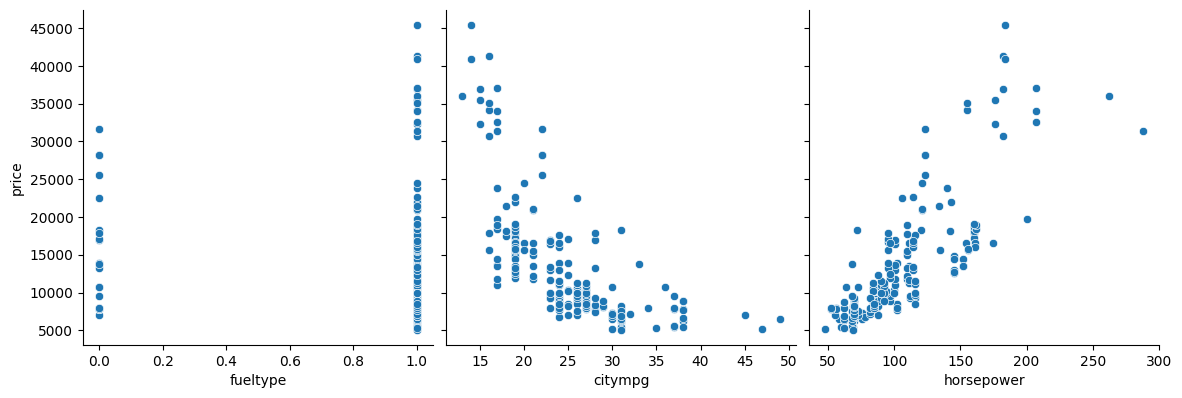

In [32]:
'''x_list=['fueltype','citympg','horsepower']
sp.lmplot(x='fueltype',y='price',data=df6)
plt.show()'''
pp = sp.pairplot(data=df6,
                  y_vars=['price'],
                  x_vars=['fueltype','citympg','horsepower'],size=4)